In [0]:
!pip install tensorflow==2.0.0

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
from tensorflow.keras.layers import (Input, Conv2D, Dense, 
                                       Dropout, Flatten, GlobalMaxPooling2D)
from tensorflow.keras.models import Model

2.0.0


In [0]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)

x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [7]:
k = len(set(y_train))
print(f"Number of classes: {k}")

Number of classes: 10


In [23]:
# Label Mapping
labels = '''Airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck
'''.split('\n')
labels

['Airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck',
 '']

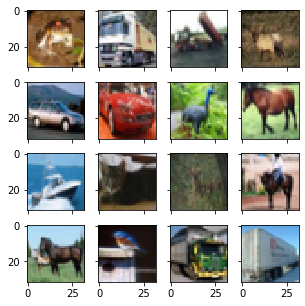

In [10]:
from mpl_toolkits.axes_grid1 import ImageGrid

imgs = []
# Append to imgs, the first 16 images from the x_train
for i in range(16):
    imgs.append(x_train[i])
fig = plt.figure(figsize=(5., 5.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4,4),  # creates (n,n) grid of axes
                 axes_pad=0.2,  # pad between axes in inch.
                 )

for ax, im in zip(grid, imgs):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")
plt.show()

In [0]:
# Build the model
# using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(filters=32, kernel_size=(3,3), strides=2, activation='relu')(i)
x = Conv2D(filters=64, kernel_size=(3, 3), strides=2, activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)

In [0]:
# Compile
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [16]:
# Fit
results = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 45s 902us/sample - loss: 1.4867 - accuracy: 0.4616 - val_loss: 1.2150 - val_accuracy: 0.5522
Epoch 2/15
50000/50000 [==============================] - 43s 867us/sample - loss: 1.1434 - accuracy: 0.5938 - val_loss: 1.1092 - val_accuracy: 0.6075
Epoch 3/15
50000/50000 [==============================] - 43s 869us/sample - loss: 0.9853 - accuracy: 0.6502 - val_loss: 0.9692 - val_accuracy: 0.6607
Epoch 4/15
50000/50000 [==============================] - 44s 880us/sample - loss: 0.8641 - accuracy: 0.6960 - val_loss: 0.9411 - val_accuracy: 0.6638
Epoch 5/15
50000/50000 [==============================] - 44s 874us/sample - loss: 0.7557 - accuracy: 0.7341 - val_loss: 0.8952 - val_accuracy: 0.6859
Epoch 6/15
50000/50000 [==============================] - 44s 875us/sample - loss: 0.6611 - accuracy: 0.7672 - val_loss: 0.8991 - val_accuracy: 0.6914
Epoch 7/15
50000/50000 [====================

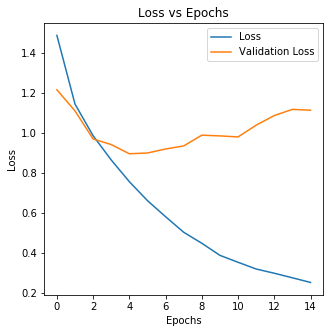

In [17]:
# Loss vs Epochs
plt.rcParams['figure.figsize'] = [5, 5] # make the plot bigger
plt.plot(results.history['loss'], label='Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title("Loss vs Epochs")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

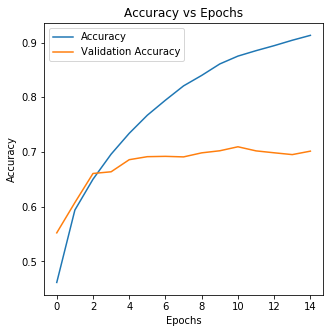

In [18]:
# Accuracy vs Epochs
plt.plot(results.history['accuracy'], label='Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy vs Epochs")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

Confusion matrix without Normalization
[[740  18  67  10  26   8  17  11  70  33]
 [ 21 797  11   5   4   6  18   4  36  98]
 [ 59   6 585  53  75  69  98  33  15   7]
 [ 22  11  63 470  74 162 117  45  14  22]
 [ 23   1  78  48 638  46  93  59   9   5]
 [ 11   6  51 168  56 598  48  44  11   7]
 [  5  10  29  34  28  17 860   6   7   4]
 [ 26   3  23  33  75  71  21 733   1  14]
 [ 62  28  15  13  10   4  11   4 833  20]
 [ 33  74  19  22   7  14  17  17  36 761]]


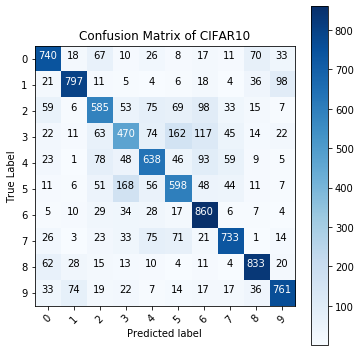

In [19]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title="Confusion Matrix of CIFAR10",
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without Normalization")
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted label")
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

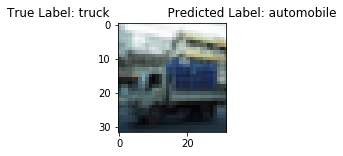

In [24]:
# Show some misclassified examples
plt.rcParams['figure.figsize'] = [2,2]
misclassified = np.where(p_test != y_test )[0]
i =  np.random.choice(misclassified)
plt.imshow(x_test[i], cmap="gray")
plt.title(f"True Label: {labels[int(y_test[i])]} \
              Predicted Label: {labels[int(p_test[i])]}")
plt.show()

In [0]:
"""
The model is overfitting as Training accuracy goes on increasing
while the validation accuracy saturates. For this problem,
we introduce a different approach called Data Augmentation.
It is a process of modifying the images. 
(Eg. Rotate, Flip, Translate, Color Trasform)
"""